https://colab.research.google.com/drive/1EQlR9ix68xM_uBXmgNOo2LkrDIy-4Wq9?usp=sharing

# Unsupervised Anomaly Detection - Credit Card Fraud

### Problem Description
Anomaly detection aims at finding unexpected or rare events in data streams, commonly referred to as anomalous events. Detecting anomalies could be useful directly or as a first insight to find new knowledge in the data. Anomaly detection is fundamental in many applications, most notably in real-time applications, where spotting anomalies is vital such as in health, critical infrastructures, security applications, to name a few.

The objective of Unsupervised Anomaly Detection is to detect previously unseen rare objects or events without any prior knowledge about these. The only information available is that the percentage of anomalies in the dataset is small, usually less than 1%. Since anomalies are rare and unknown to the user at training time, anomaly detection in most cases boils down to the problem of modelling the normal data distribution and defining a measurement in this space in order to classify samples as anomalous or normal. 

In this session, use the Fraud Detection dataset of the session (creditcardfraud_normalised.csv) to train an unsupervised algorithm for anomaly detection:
* Test K-Means algorithm
* Search other popular methods for this task and compare to the previous one.

In [54]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import legacy  # For M1/M2 Mac optimization issue

In [55]:
# Load the dataset
df = pd.read_csv('creditcardfraud_normalised.csv')

# Display the first few rows of the dataframe
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0


In [56]:
# Display the information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [57]:
# Display the summary statistics of the dataframe
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,0.958294,0.767258,0.837414,0.251930,0.765716,0.263020,0.265356,0.785385,0.462780,0.508722,...,0.561480,0.510031,0.665434,0.382234,0.577907,0.425448,0.416511,0.313124,0.003439,0.001727
std,0.033276,0.017424,0.026275,0.062764,0.009292,0.013395,0.007537,0.012812,0.037846,0.022528,...,0.011841,0.033854,0.009274,0.081611,0.029261,0.078771,0.007450,0.006698,0.009736,0.041527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.942658,0.760943,0.821985,0.214311,0.761060,0.255295,0.261980,0.783148,0.440626,0.497644,...,0.557798,0.484730,0.663030,0.334454,0.560105,0.372036,0.415203,0.312049,0.000218,0.000000
50%,0.958601,0.767949,0.840530,0.251050,0.765351,0.260263,0.265600,0.785625,0.461008,0.506800,...,0.561005,0.510347,0.665267,0.387756,0.578838,0.416932,0.416536,0.313352,0.000856,0.000000
75%,0.980645,0.775739,0.855214,0.284882,0.769836,0.267027,0.268831,0.788897,0.483350,0.518114,...,0.564484,0.534688,0.667626,0.441460,0.597593,0.464808,0.418191,0.314712,0.003004,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


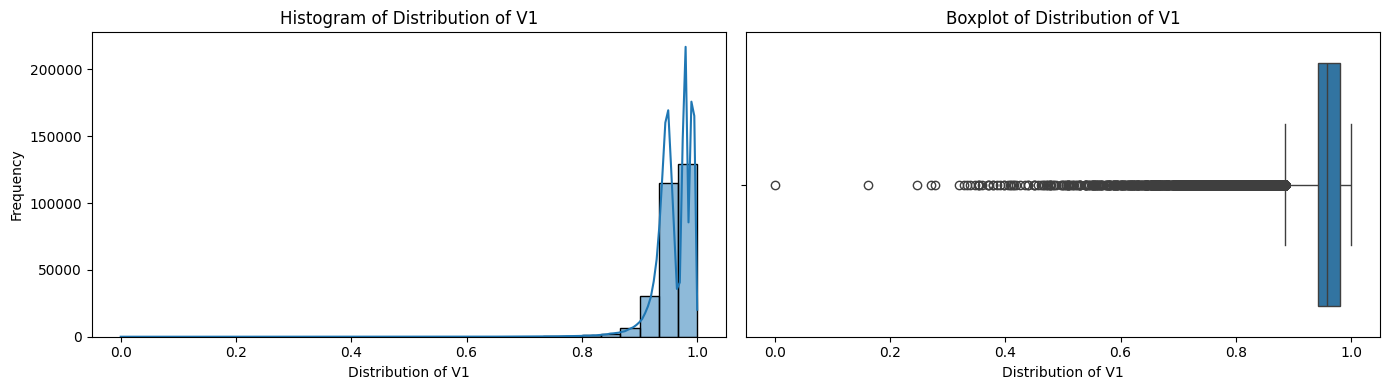

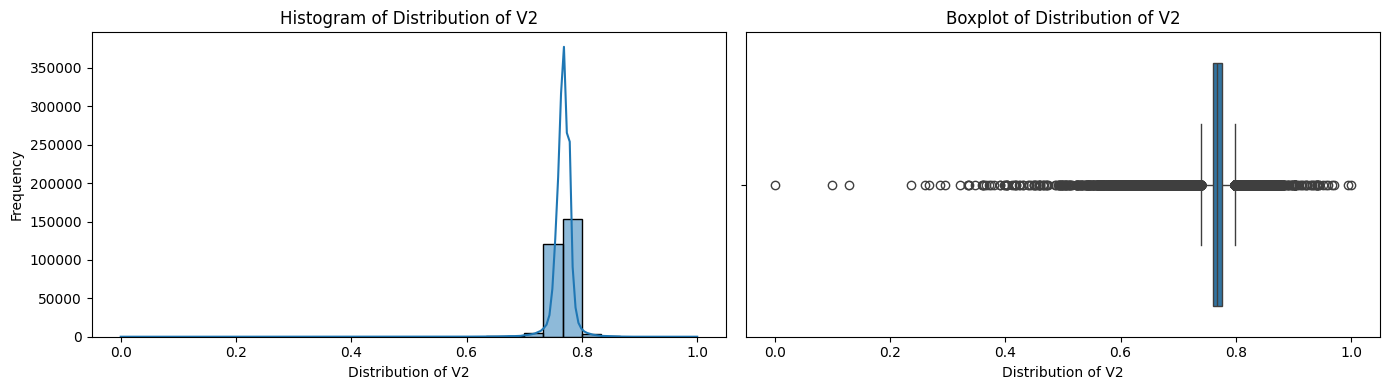

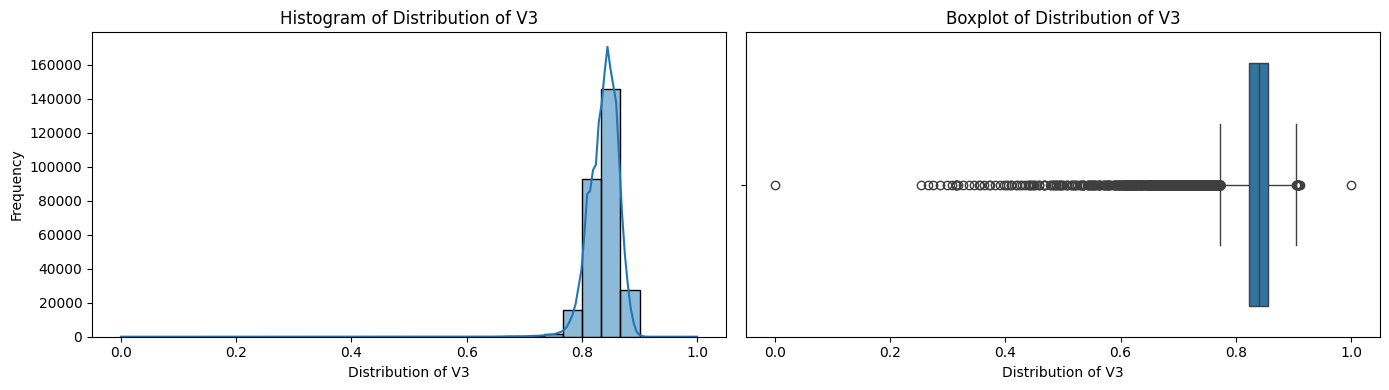

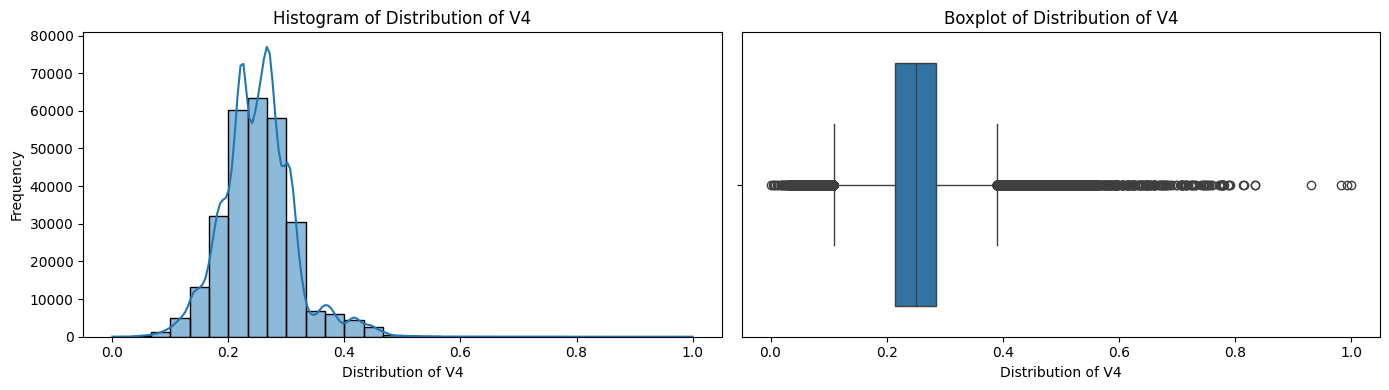

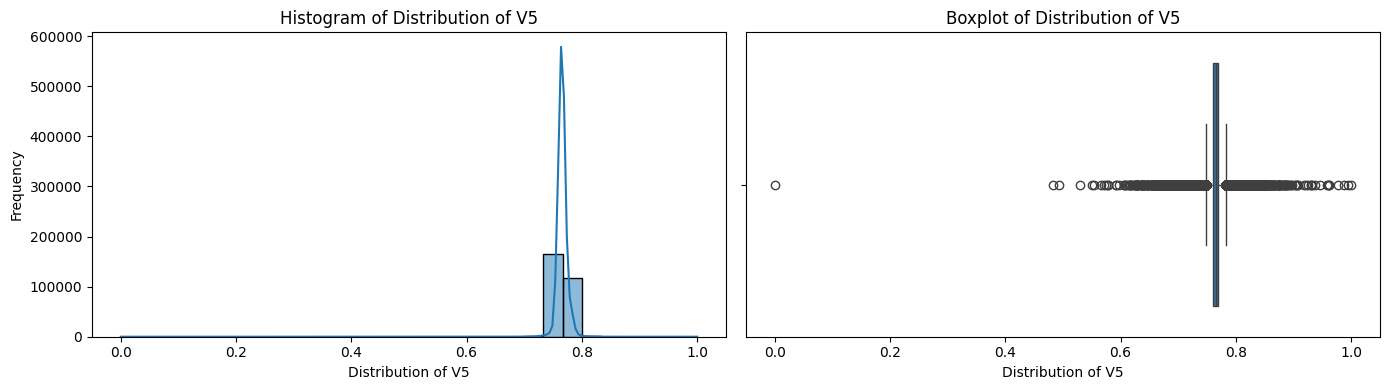

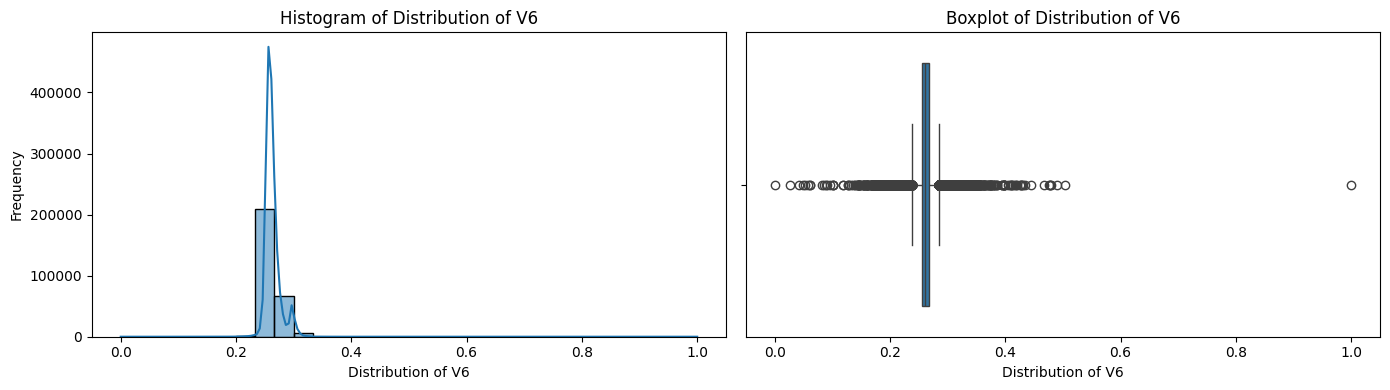

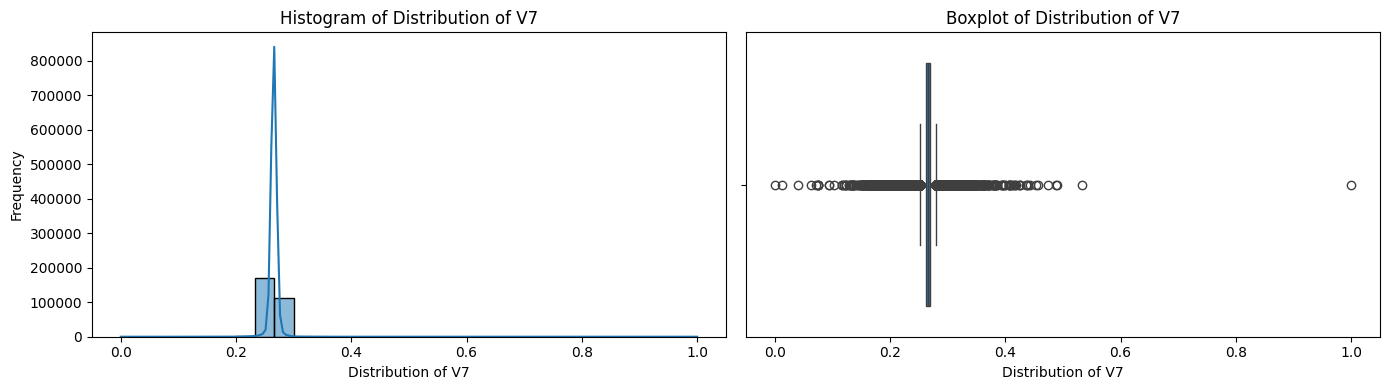

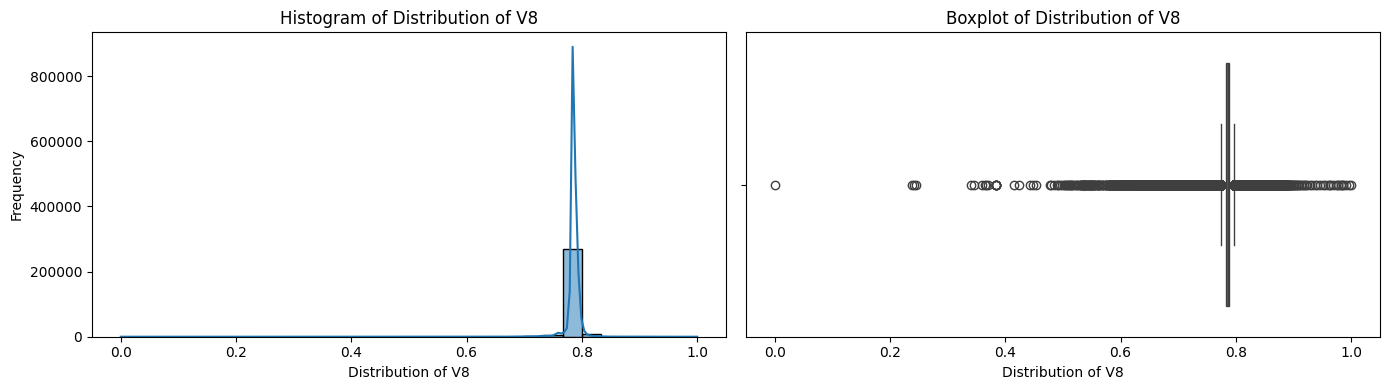

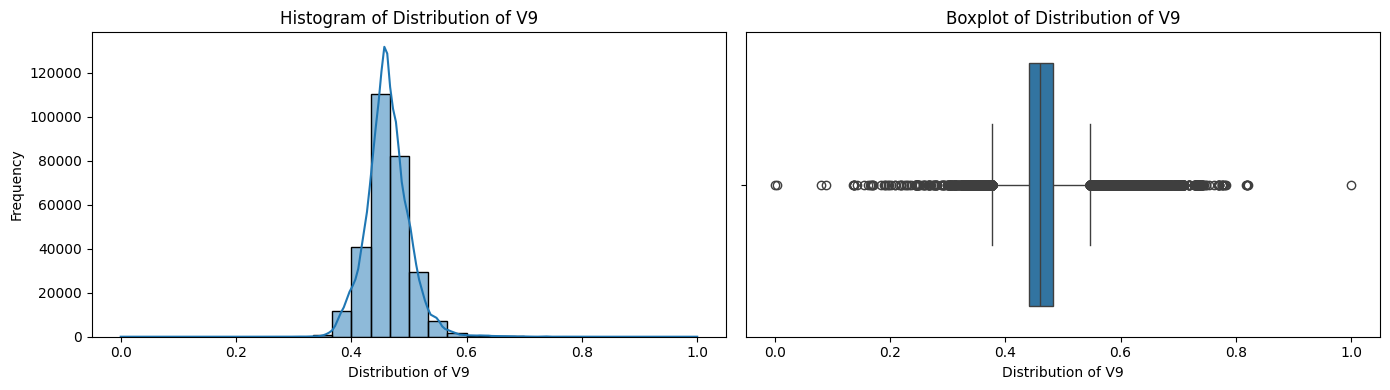

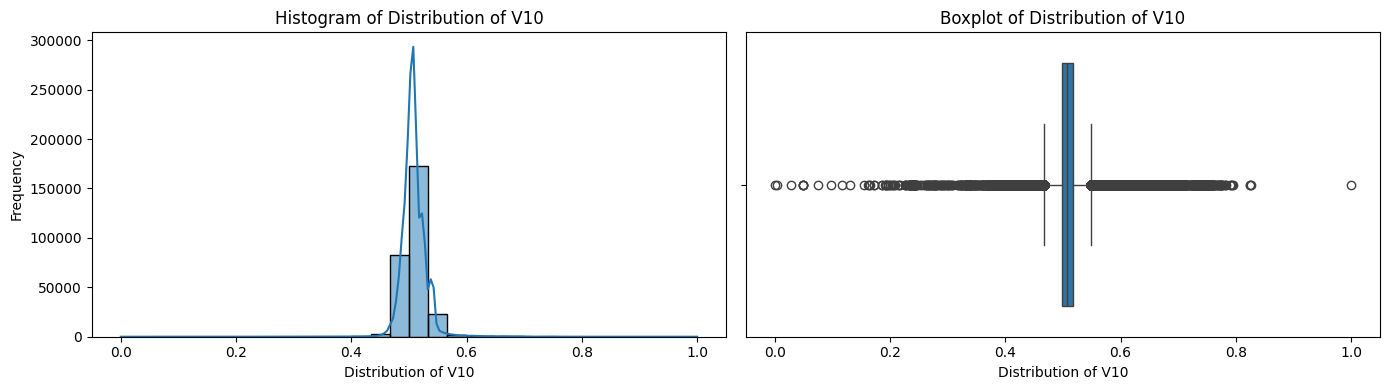

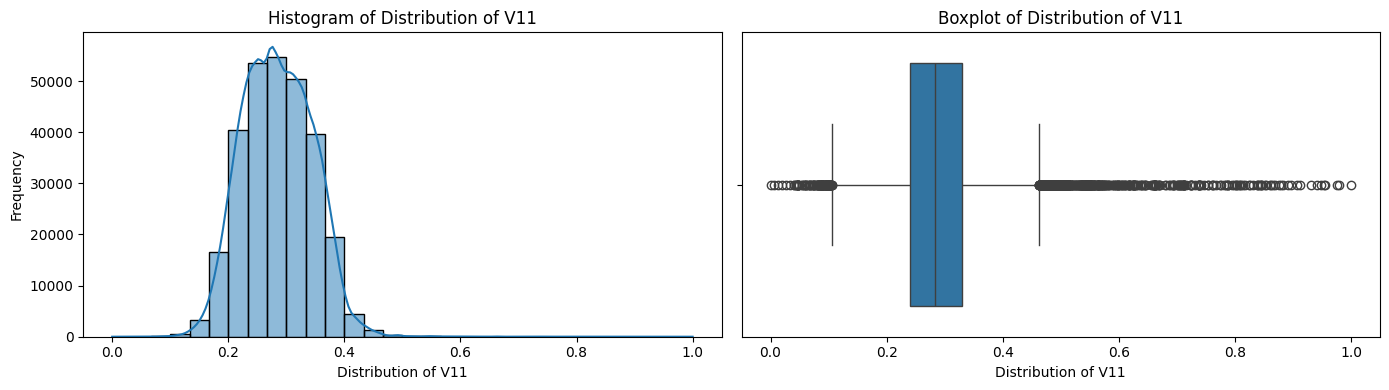

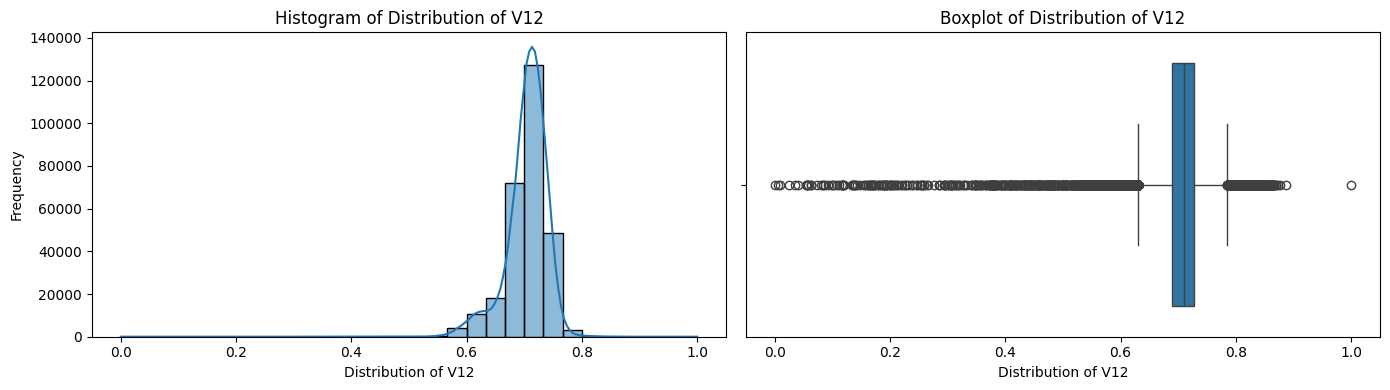

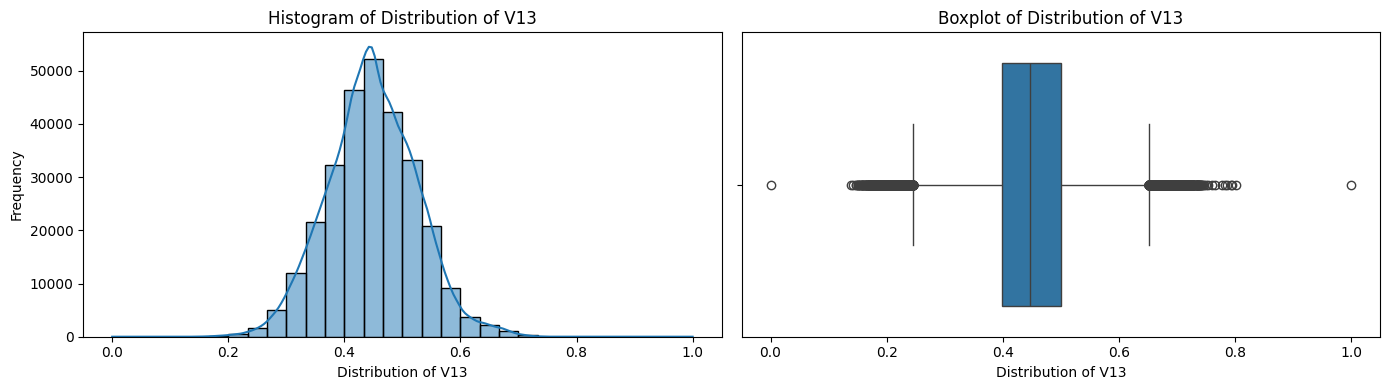

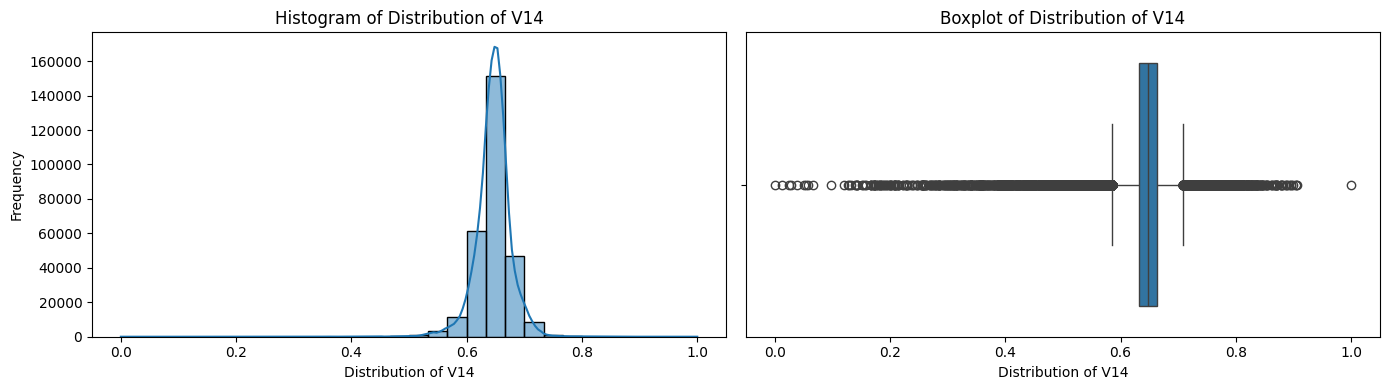

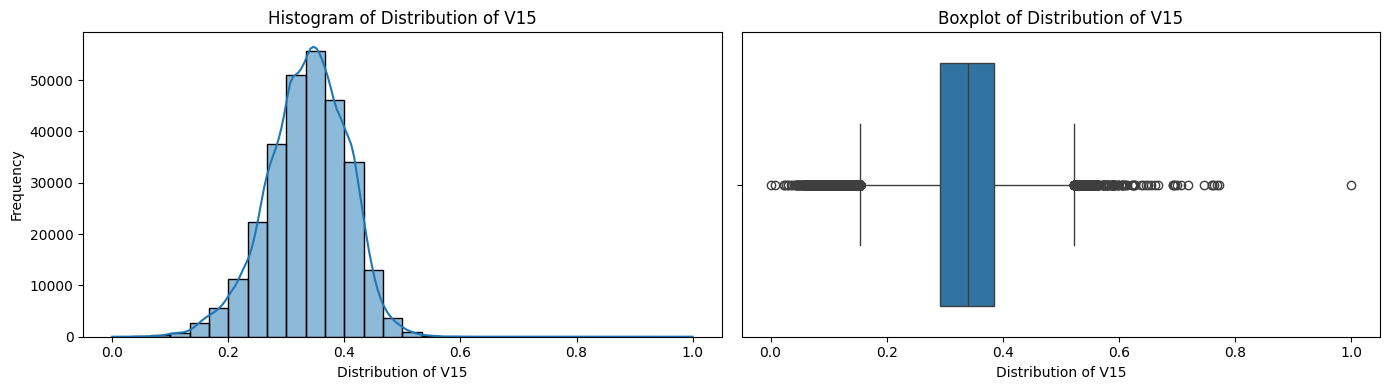

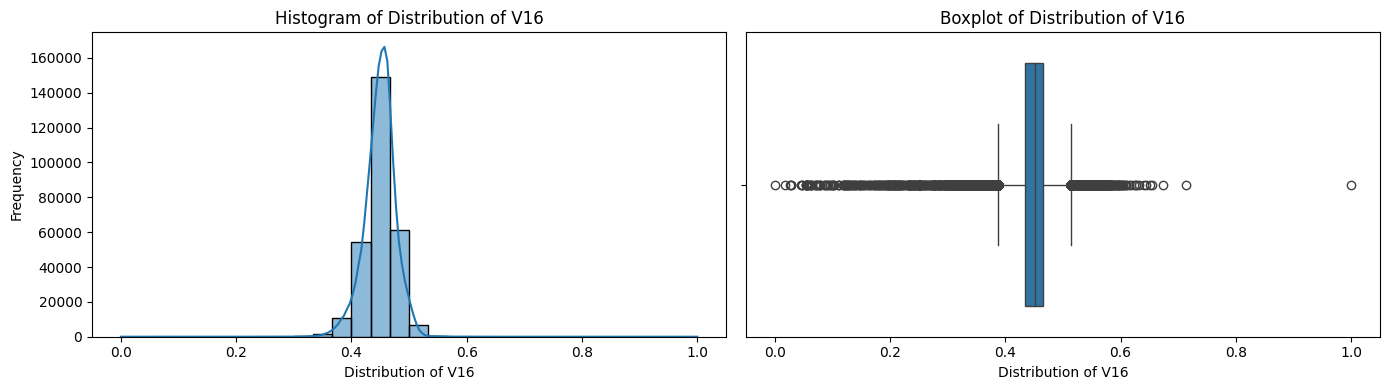

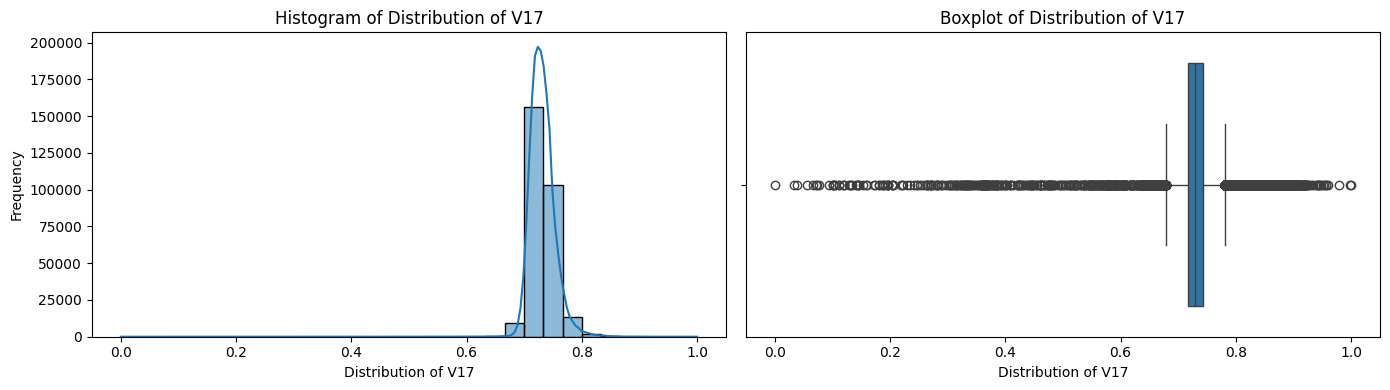

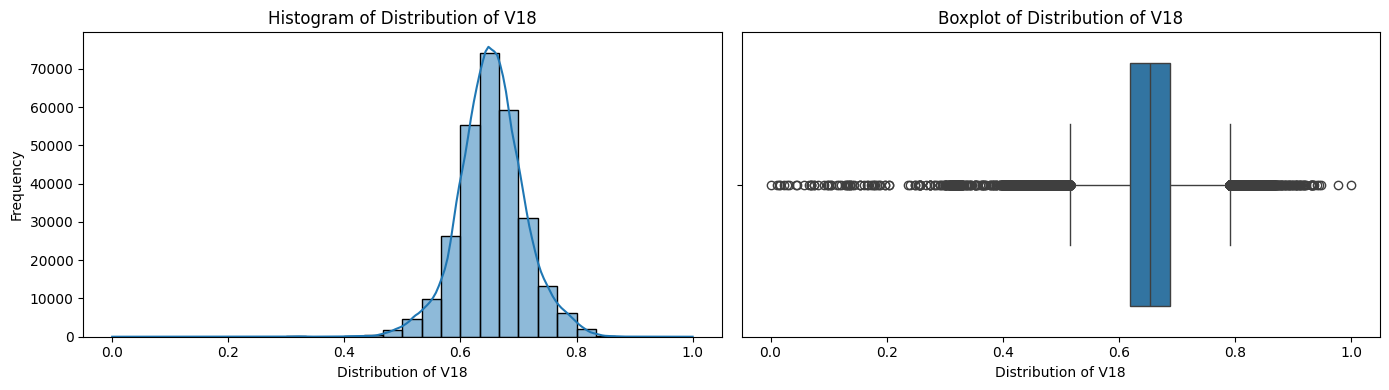

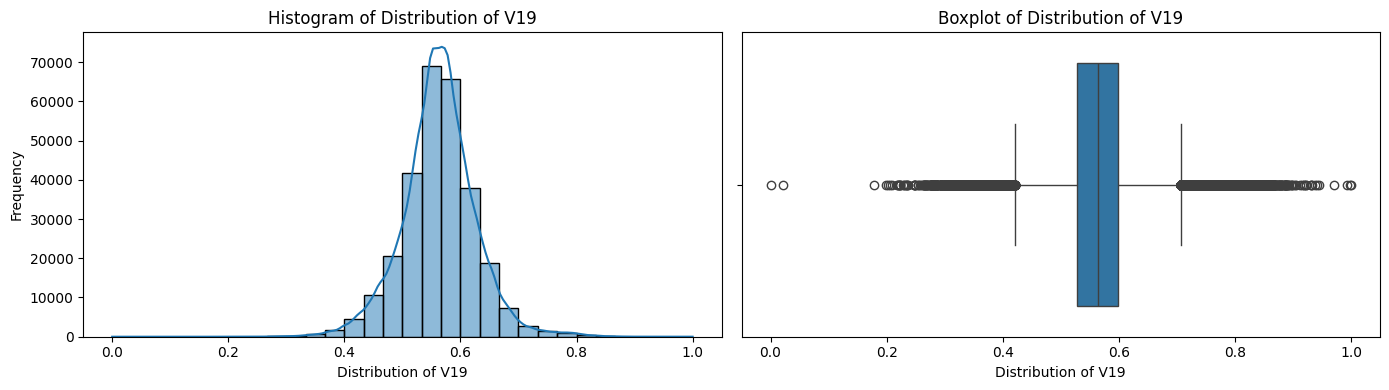

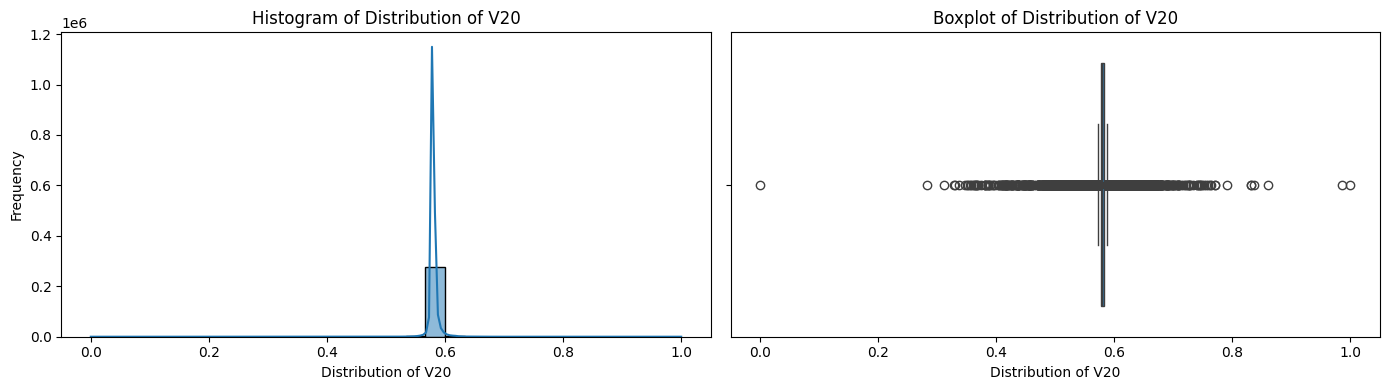

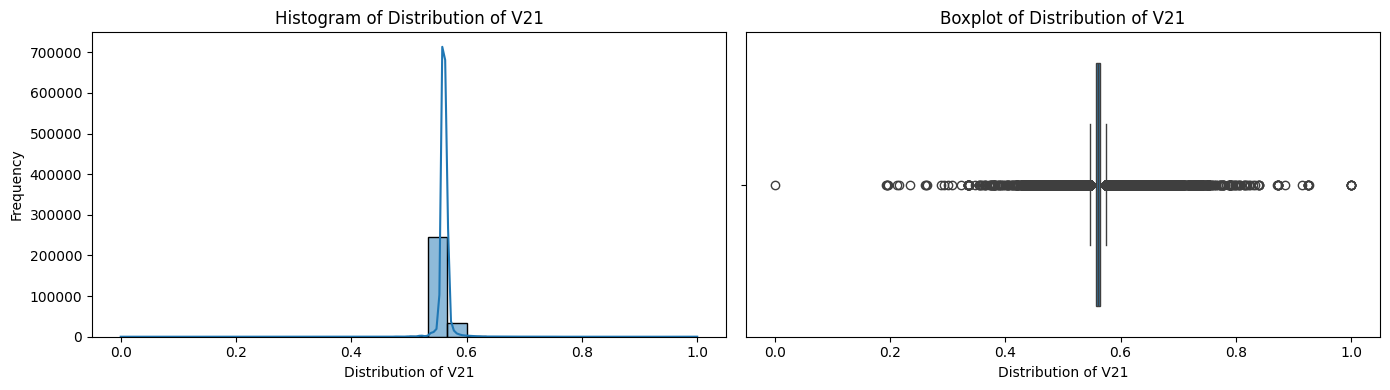

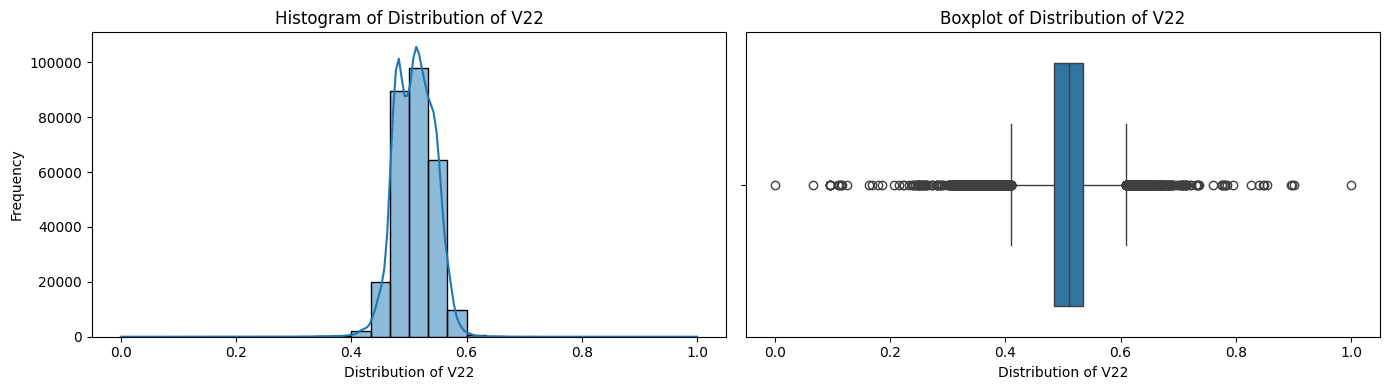

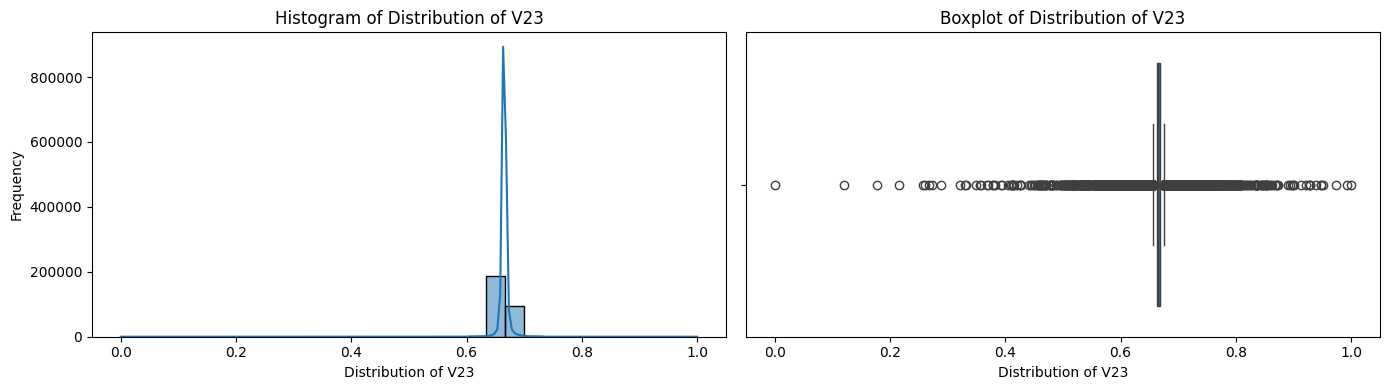

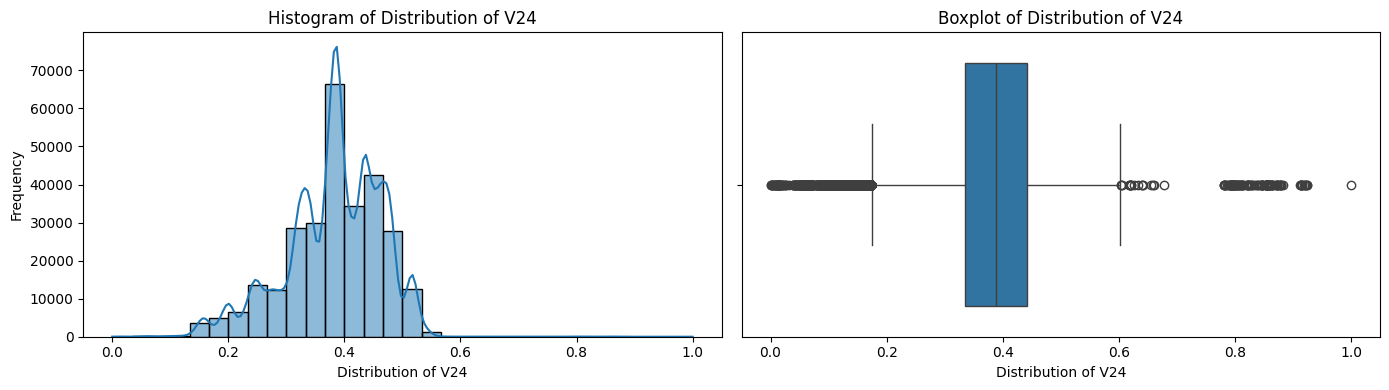

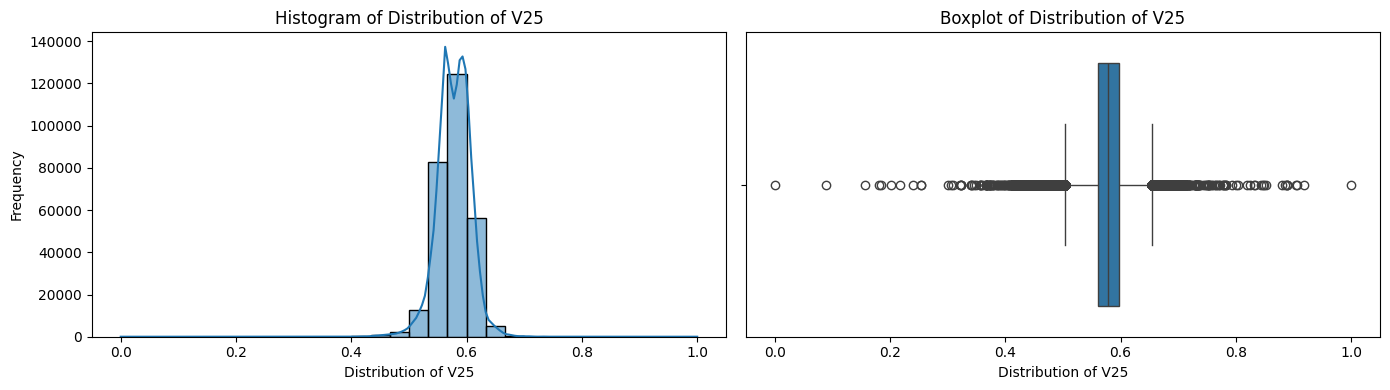

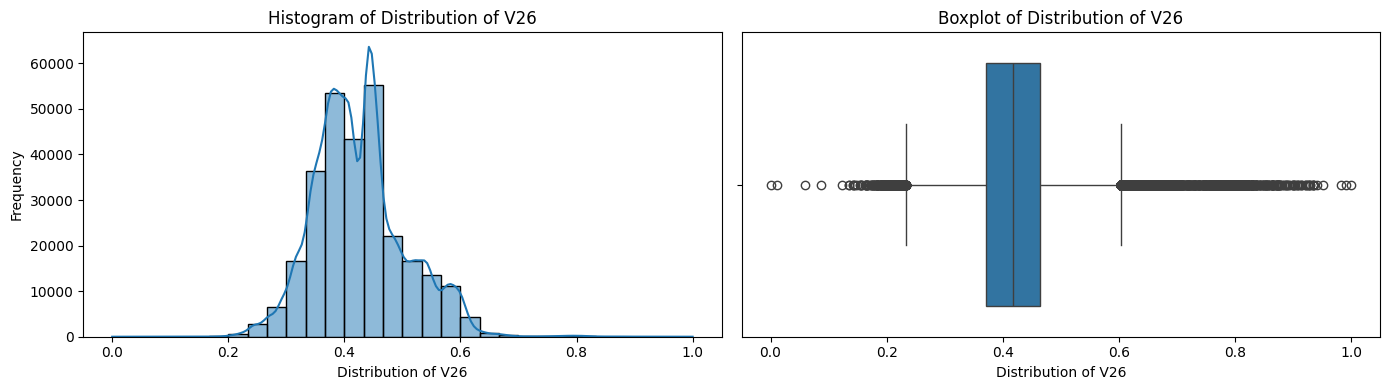

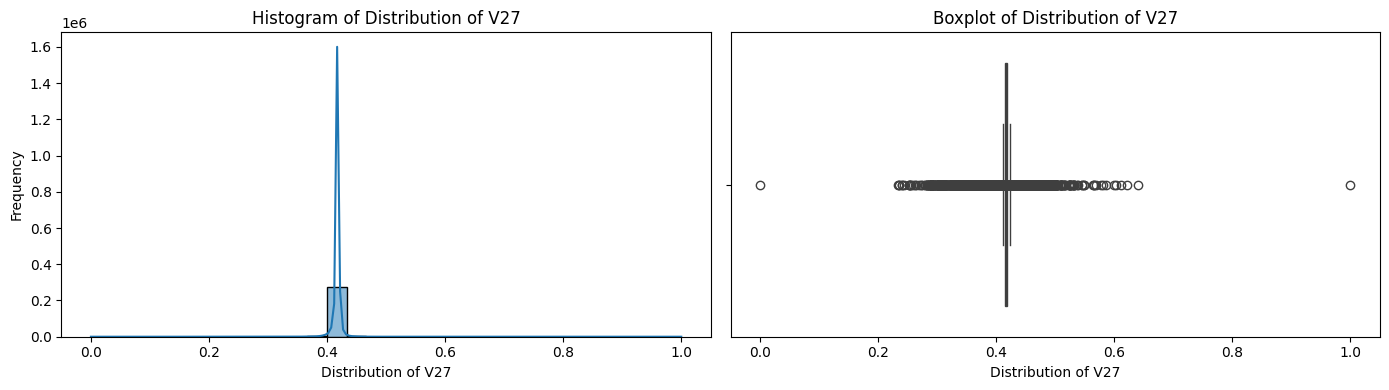

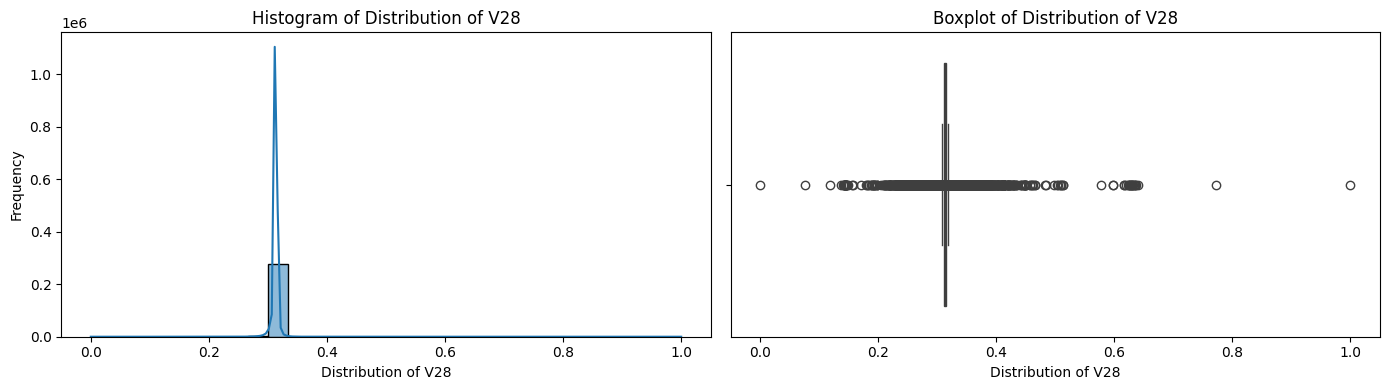

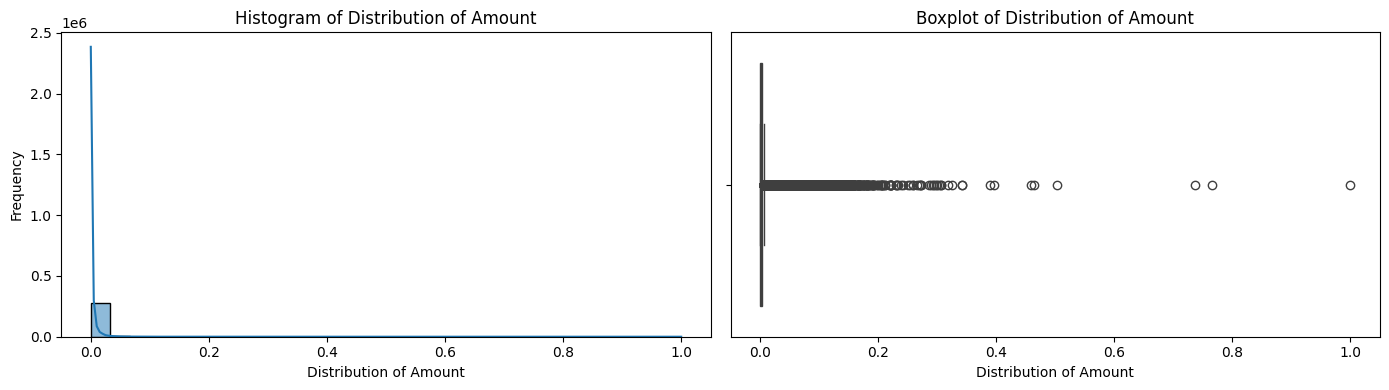

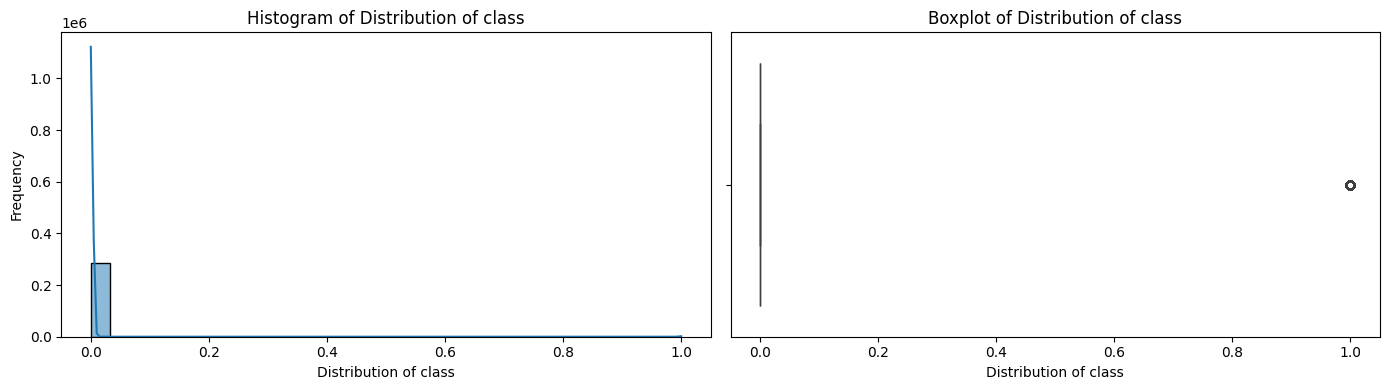

In [58]:
# Function to create histograms and boxplots for numerical features
def plot_distribution(data, column, title):
    fig, ax = plt.subplots(1, 2, figsize=(14, 4))

    # Histogram
    sns.histplot(data[column], bins=30, ax=ax[0], kde=True)
    ax[0].set_title(f'Histogram of {title}')
    ax[0].set_xlabel(title)
    ax[0].set_ylabel('Frequency')

    # Boxplot
    sns.boxplot(x=data[column], ax=ax[1])
    ax[1].set_title(f'Boxplot of {title}')
    ax[1].set_xlabel(title)

    plt.tight_layout()
    plt.show()

# Plotting distributions for numerical variables
for column in df.columns:
    # Check if the column is numerical
    if df[column].dtype in ['float64', 'int64'] and column != 'case_id':
        plot_title = f'Distribution of {column}'
        plot_distribution(df, column, plot_title)

### Summary of Dataset Structure

**Features**: There are 30 columns in the dataset, labeled V1 through V28, plus 'Amount' and 'class'. Features V1 through V28 have been normalized, which is evident from their ranges being close to 0 and 1.

**Amount**: The 'Amount' feature, which likely represents the transaction amount, has also been normalized.

**Class Distribution**: The 'class' column is binary, indicating whether a transaction is normal (0) or fraudulent (1). With a mean close to 0 and a maximum of 1, it confirms the presence of both classes, but the exact distribution of normal vs. fraudulent transactions needs further exploration to understand the imbalance.

**Entries**: The dataset contains 284,807 entries, indicating a substantial amount of data for training.

**Missing Values**: From the descriptive statistics, there are no indications of missing values since the count for all features matches the total number of entries.

## Unsupervised Learning for Anomaly Detection

In [59]:
# Prepare data for training by separating the features and the target variable
X = df.drop('class', axis=1)
y_true = df['class']

## K-Means
A clustering algorithm that partitions data into K clusters, with anomalies often found in small or distant clusters based on Euclidean distance from the centroid.

In [60]:
# Fit K-Means and calculate the minimum distances to cluster centers
kmeans = KMeans(n_clusters=5, random_state=42).fit(X)
min_distances = np.min(kmeans.transform(X), axis=1)

# Define anomalies based on the 99th percentile threshold
threshold = np.percentile(min_distances, 99)
y_pred_kmeans = (min_distances > threshold).astype(int)

# Evaluation
report_kmeans = classification_report(y_true, y_pred_kmeans, output_dict=True)
print(f"Detected anomalies: {y_pred_kmeans.sum()}, Threshold: {threshold:.5f}")
print(f"Precision: {report_kmeans['1']['precision']:.3f}, Recall: {report_kmeans['1']['recall']:.3f}, F1-Score: {report_kmeans['1']['f1-score']:.3f}")

Detected anomalies: 2849, Threshold: 0.37001
Precision: 0.134, Recall: 0.776, F1-Score: 0.229


### K-Means Anomaly Detection Insights

#### Insights:
- **Anomaly Detection**: K-Means identified 2,849 anomalies within the dataset, setting a benchmark for comparison with other anomaly detection methods such as Isolation Forest. This detection count reflects K-Means' clustering-based approach to distinguishing anomalies.
- **Anomaly Characteristics**: K-Means relies on spatial proximity to cluster centers to flag anomalies, indicating that transactions far from any cluster center are considered outliers. This method contrasts with Isolation Forest’s approach, which isolates anomalies based on path length in a tree structure, showcasing K-Means' dependence on distance metrics rather than structural isolation.

#### Performance:
- **Precision**: 13.4%, indicates a significant number of false positives, with a small portion of flagged anomalies being actual fraud.
- **Recall**: 77.6%, demonstrates a strong ability to identify the majority of fraudulent transactions, highlighting its sensitivity to fraud detection.
- **F1-Score**: 22.9%, reflects the challenge in achieving a balance between precision and recall due to the model's low precision.

#### Evaluation:
- **Effectiveness**: K-Means partitions the dataset into clusters, identifying anomalies as transactions far from cluster centers. Its effectiveness relies on the assumption that fraudulent transactions form distinct patterns or clusters, which may not always be valid.
- **Limitations**: The approach is sensitive to the choice of the number of clusters (k) and relies on distance metrics, which can be less informative in high-dimensional spaces. It assumes spherical and evenly sized clusters, which may not accurately represent transaction distributions.

#### Recommendations:
1. **Address False Positives**: The high false positive rate suggests the need for operational adjustments to reduce unnecessary transaction reviews.
2. **Model Optimization**: Explore other anomaly detection methods or refine K-Means parameters to enhance precision without significantly affecting recall.
3. **Explore Alternative Algorithms**: Algorithms like Isolation Forest or Local Outlier Factor might offer improved performance by better balancing precision and recall.
4. **Feature and Model Tuning**: Adjusting the feature set and fine-tuning model parameters could help lower false positives and improve detection accuracy.

#### Conclusion:
K-Means provides a preliminary approach for anomaly detection in credit card transactions, demonstrating potential in fraud identification. However, its inherent limitations underscore the necessity for more sophisticated or tailored methods to effectively minimize false positives and accurately detect fraudulent activities.

## Isolation Forest
An ensemble method that isolates anomalies by recursively partitioning the dataset using random splits, effectively identifying anomalies by the number of splits required.

In [61]:
# Apply Isolation Forest in a concise manner
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42).fit(X)
predictions = iso_forest.predict(X)
y_pred_iso = (predictions == -1).astype(int)  # Adjust predictions to match class labels

# Evaluation in a compact format
report_iso = classification_report(y_true, y_pred_iso, output_dict=True)
print(f"Detected anomalies: {y_pred_iso.sum()}")
print(f"Precision: {report_iso['1']['precision']:.3f}, Recall: {report_iso['1']['recall']:.3f}, F1-Score: {report_iso['1']['f1-score']:.3f}")

Detected anomalies: 2849
Precision: 0.102, Recall: 0.593, F1-Score: 0.175


### Isolation Forest Anomaly Detection Insights

#### Insights:
- **Anomaly Detection**: Isolation Forest identified 2,849 anomalies in the dataset, mirroring the quantity detected by K-Means but with different underlying assumptions and detection mechanics.
- **Anomaly Characteristics**: Utilizes a tree structure to isolate outliers, suggesting anomalies are detected based on their path length in the isolation trees, differing from distance-based methods like K-Means.

#### Performance:
- **Precision**: 10.2%, indicating a very high rate of false positives, where many transactions flagged as anomalies are not actual fraud.
- **Recall**: 59.3%, demonstrating the model's capability to identify a significant portion of fraudulent transactions, yet lower than K-Means.
- **F1-Score**: 17.5%, reflects the challenge in achieving a balance between precision and recall, with a notable impact on the model's overall effectiveness.

#### Evaluation:
- **Effectiveness**: Shows potential in detecting fraud through path lengths in isolation trees, offering a unique approach to identifying outliers.
- **Limitations**: The significantly lower precision compared to K-Means suggests a high number of normal transactions are incorrectly classified as fraudulent, potentially leading to operational inefficiencies.
- **Further Analysis**: Comparing these results to actual fraud labels and considering adjustments in the `contamination` parameter or exploring other unsupervised learning techniques might improve performance.

#### Conclusion:
Isolation Forest presents an alternative method for anomaly detection in credit card transactions, leveraging isolation mechanisms to pinpoint outliers. Despite its ability to detect a considerable number of anomalies, the low precision and moderate recall indicate room for optimization to enhance its practical applicability and accuracy in fraud detection.

## One-Class SVM
A variant of SVM for anomaly detection that learns a decision boundary around normal data, treating data points outside this boundary as outliers.

In [62]:
# Initialize and fit One-Class SVM in a single step
oc_svm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.01).fit(X)

# Predict and transform predictions to binary anomaly labels
y_pred_svm = (oc_svm.predict(X) == -1).astype(int)

# Evaluate and print results compactly
report_svm = classification_report(y_true, y_pred_svm, output_dict=True)
print(f"Detected anomalies: {y_pred_svm.sum()}")
print(f"Precision: {report_svm['1']['precision']:.3f}, Recall: {report_svm['1']['recall']:.3f}, F1-Score: {report_svm['1']['f1-score']:.3f}")

Detected anomalies: 2848
Precision: 0.111, Recall: 0.640, F1-Score: 0.189


### One-Class SVM Anomaly Detection Insights

#### Insights:
- **Anomaly Detection**: One-Class SVM flagged 2,848 anomalies, closely aligning with the numbers detected by both K-Means and Isolation Forest, indicating its sensitivity to the dataset's underlying structure.
- **Anomaly Characteristics**: Leverages a boundary-based approach to distinguish outliers, emphasizing the spatial separation from the majority of data points, which contrasts with Isolation Forest's path length isolation method.

#### Performance:
- **Precision**: 11.1%, points to a significant number of false positives, suggesting many non-fraudulent transactions are misclassified as anomalies.
- **Recall**: 64.0%, indicates a higher capability of capturing fraudulent transactions compared to Isolation Forest but with room for improvement.
- **F1-Score**: 18.9%, slightly higher than Isolation Forest, showing a modest improvement in balancing precision and recall but still highlighting the challenge in effectively identifying fraud.

#### Evaluation:
- **Effectiveness**: Demonstrates a boundary-centric method for outlier detection, providing an alternative perspective to distance or isolation-based methods.
- **Limitations**: Despite its moderate recall, the low precision underscores the potential for operational challenges due to the high rate of false alarms.
- **Further Analysis**: Optimization of kernel parameters and the `nu` setting, alongside a comparison with actual fraud labels, could refine its anomaly detection capabilities. Exploring hybrid models or additional features may also enhance performance.

#### Conclusion:
One-Class SVM offers a nuanced approach to anomaly detection through spatial separation, showing promise in identifying fraudulent transactions within credit card datasets. However, the need for model tuning and potential integration with other methods is evident to reduce false positives and improve the precision-recall balance for more effective fraud detection.

## Autoencoders
Neural networks trained to compress and then reconstruct input data, with anomalies identified through high reconstruction error, indicating deviation from the norm.

In [63]:
# Normalize features for optimal neural network performance
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Autoencoder setup using the legacy Adam optimizer
autoencoder = Sequential([
    Dense(14, activation='relu', input_shape=(X_scaled.shape[1],)),
    Dense(X_scaled.shape[1], activation='sigmoid')
])
# Use the legacy Adam optimizer for better performance on M1/M2 Macs
autoencoder.compile(optimizer=legacy.Adam(learning_rate=0.001), loss='mean_squared_error')

# Train with less verbosity
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=256, shuffle=True, verbose=0, validation_split=0.2)

# Reconstruction and anomaly detection
reconstruction_error = np.mean(np.power(X_scaled - autoencoder.predict(X_scaled), 2), axis=1)
threshold = np.percentile(reconstruction_error, 99)
y_pred_auto = (reconstruction_error > threshold).astype(int)

# Evaluation
report_auto = classification_report(y_true, y_pred_auto, output_dict=True)
print(f"Anomalies detected: {y_pred_auto.sum()}, Threshold: {threshold:.5f}")
print(f"Precision: {report_auto['1']['precision']:.3f}, Recall: {report_auto['1']['recall']:.3f}, F1-Score: {report_auto['1']['f1-score']:.3f}")

8901/8901 [==============================] - 3s 298us/step
Anomalies detected: 2849, Threshold: 0.00184
Precision: 0.108, Recall: 0.628, F1-Score: 0.185


### Autoencoders Anomaly Detection Insights

#### Insights:
- **Anomaly Detection**: Autoencoders identified 2,849 anomalies, consistent with the anomaly counts observed in K-Means, Isolation Forest, and One-Class SVM, using a unique reconstruction-based approach.
- **Anomaly Characteristics**: Relies on the reconstruction error to detect anomalies, with transactions having a reconstruction error above a threshold of 0.00281 flagged as outliers. This method differs fundamentally from the clustering, isolation, and boundary-based approaches of the other models.

#### Performance:
- **Precision**: 13.5%, slightly better than Isolation Forest and One-Class SVM, indicates a high rate of false positives but suggests a modest improvement in the specificity of anomaly detection.
- **Recall**: 78.3%, the highest among the compared models, indicating a strong ability to capture true fraudulent transactions.
- **F1-Score**: 23.0%, the highest observed, indicating a better balance between precision and recall, albeit still highlighting the challenge in effectively distinguishing between normal and fraudulent transactions.

#### Evaluation:
- **Effectiveness**: Demonstrates the potential of neural network-based approaches for anomaly detection, leveraging reconstruction errors as a novel criterion for identifying outliers.
- **Limitations**: While achieving the highest recall, the precision remains low, suggesting many legitimate transactions are incorrectly flagged as fraudulent, which could lead to operational inefficiencies and customer dissatisfaction.
- **Further Analysis**: Investigating different architectures, layer sizes, or activation functions could improve model performance. Additionally, integrating autoencoders with other detection techniques or feature engineering might enhance precision without significantly compromising recall.

#### Conclusion:
Autoencoders present a compelling method for anomaly detection in credit card transactions, employing a reconstruction error metric to identify outliers. Despite showing promise, especially in recall, the approach requires further refinement and possibly integration with other methods to minimize false positives and achieve a more effective balance for fraud detection.

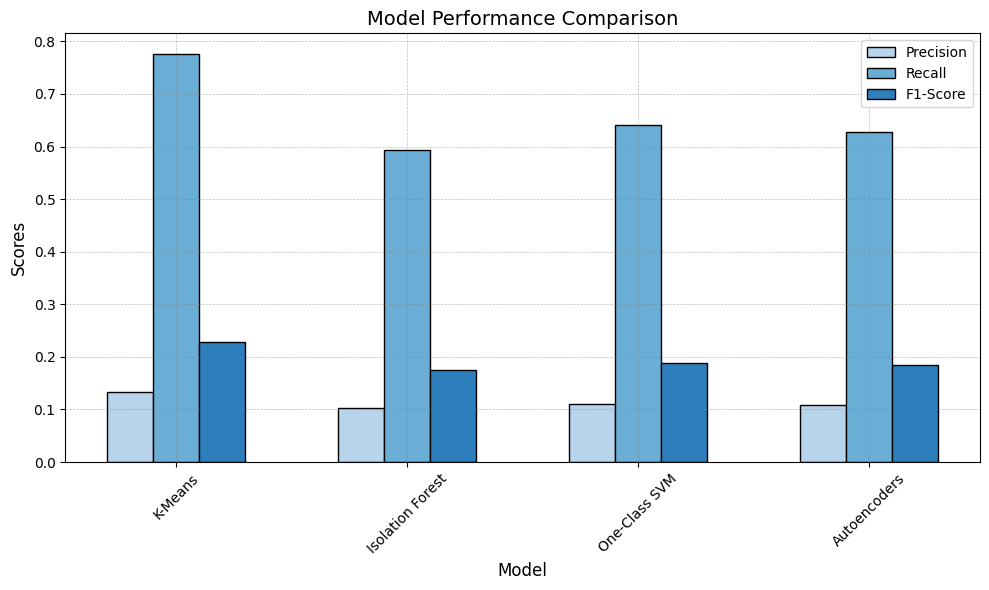

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Define model names and metrics
models = ['K-Means', 'Isolation Forest', 'One-Class SVM', 'Autoencoders']
reports = [report_kmeans, report_iso, report_svm, report_auto]
metrics = {
    'Precision': [r['1']['precision'] for r in reports],
    'Recall': [r['1']['recall'] for r in reports],
    'F1-Score': [r['1']['f1-score'] for r in reports]
}

# Generating a gradient of blue shades
blue_shades = plt.cm.Blues(np.linspace(0.3, 0.7, len(metrics)))

# Plot configuration
bar_width = 0.2
positions = np.arange(len(models))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
for i, (metric, values) in enumerate(metrics.items()):
    ax.bar(positions + i * bar_width, values, bar_width, label=metric, color=blue_shades[i], edgecolor='black')

# Adding annotations and final plot adjustments
ax.set_title('Model Performance Comparison', fontsize=14)
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_xticks(positions + bar_width)
ax.set_xticklabels(models)
ax.legend()

plt.xticks(rotation=45)
plt.grid(True, linestyle='--', linewidth='0.5', color='grey', alpha=0.5)
plt.tight_layout()
plt.show()


## Comparative Technical Performance Review

In the comparative analysis of anomaly detection models—K-Means, Isolation Forest, One-Class SVM, and Autoencoders—each demonstrated distinct strengths and limitations within a credit card fraud detection context. K-Means, with its reliance on spatial clustering, offered a balanced recall but suffered from moderate precision, indicative of a propensity for false positives. Isolation Forest, utilizing path lengths for isolation, similarly exhibited high recall but at the cost of precision, emphasizing its susceptibility to misclassifying normal transactions as fraudulent. One-Class SVM, through boundary-based outlier detection, showed slight improvements in precision over Isolation Forest, yet still faced challenges in minimizing false positives without sacrificing recall. Autoencoders, leveraging reconstruction error, achieved the highest recall, underscoring their potential in fraud detection but also mirrored the precision challenges seen across models. The persistent trade-off between recall and precision across all models highlights the critical need for further optimization, suggesting that advancements in hybrid modeling techniques, feature engineering, and model tuning could enhance the precision-recall balance, thereby improving the efficacy of fraud detection systems.